In [54]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [55]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [56]:
len(x_train)

60000

In [100]:
len(y_train)

60000

In [57]:
len(x_test)

10000

In [58]:
x_train[0].shape

(28, 28)

In [59]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

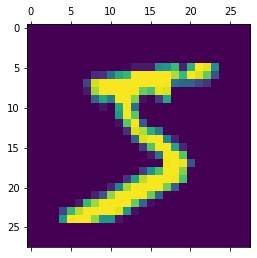

In [60]:
plt.matshow(x_train[0])

In [61]:
y_train[0]

5

In [62]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

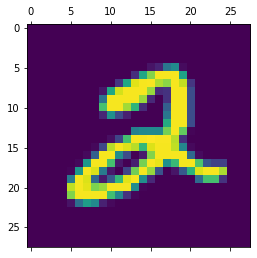

In [63]:
plt.matshow(x_train[5])

In [64]:
x_train.shape

(60000, 28, 28)

In [65]:
x_train = x_train /255
x_test = x_test /255

In [66]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_train_flattened.shape


(60000, 784)

In [67]:
x_test_flattened = x_test.reshape(len(x_test),28*28)
x_test_flattened.shape

(10000, 784)

In [68]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [69]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation = 'sigmoid')
])
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
             )

model.fit(x_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4702 - accuracy: 0.8770
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3039 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2835 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2728 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2666 - accuracy: 0.9261


In [71]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2671 - accuracy: 0.9256


[0.2670840919017792, 0.925599992275238]

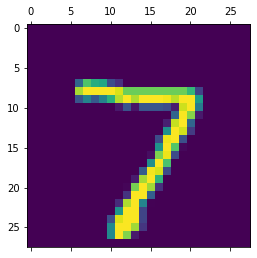

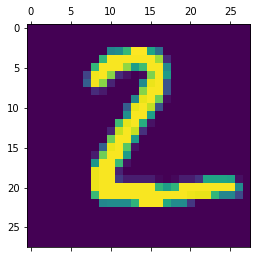

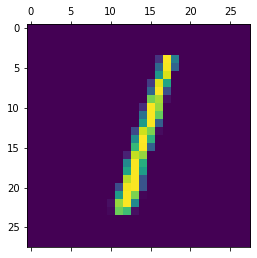

In [106]:
for i in range(3):
    plt.matshow(x_test[i])


In [74]:
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

array([1.78574026e-02, 3.75630236e-07, 3.60146463e-02, 9.55562592e-01,
       1.84488297e-03, 1.00378335e-01, 1.68990982e-06, 9.99811888e-01,
       6.21499717e-02, 6.10752702e-01], dtype=float32)

In [78]:
np.argmax(y_predicted[2])

1

In [79]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [80]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    2,    0,    5,    9,    2,    1,    0],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   3,    9,  921,   18,    8,    5,   13,   13,   37,    5],
       [   3,    0,   18,  923,    0,   24,    2,   12,   21,    7],
       [   1,    1,    2,    1,  907,    0,   15,    5,   10,   40],
       [   8,    3,    3,   32,    8,  782,   17,    6,   27,    6],
       [   8,    3,    4,    1,    7,   12,  919,    2,    2,    0],
       [   1,    5,   21,    8,    6,    0,    0,  959,    2,   26],
       [   7,   10,    6,   26,    9,   32,   11,   12,  852,    9],
       [  11,    7,    1,   10,   23,    7,    0,   27,    5,  918]])>

Text(69.0, 0.5, 'Truth')

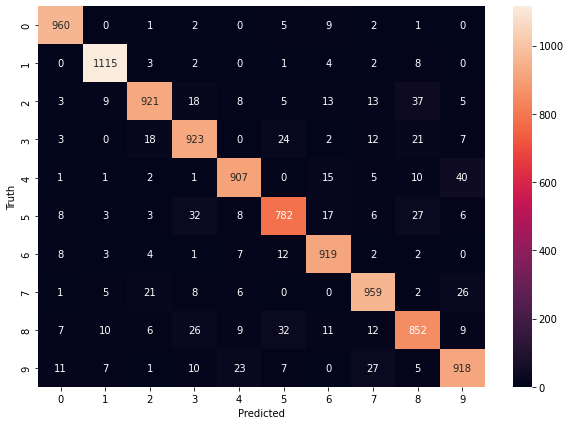

In [84]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(69.0, 0.5, 'Truth')

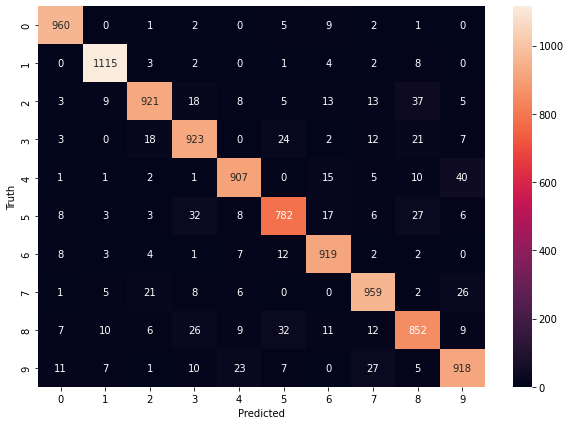

In [87]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [107]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100,activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
             )

model.fit(x_train, y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2637 - accuracy: 0.9247
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1185 - accuracy: 0.9654
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0820 - accuracy: 0.9756
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0637 - accuracy: 0.9808
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0498 - accuracy: 0.9845
